# SunRGB Data Analysis on the x, y, z, coordinates distributions of objects' bounding boxes' centers

## Processing the Numpy files:

In [1]:
## Open a .npy file
import numpy as np
import matplotlib.pyplot as plt
import sys

filename = "3d_visualizations/000001_bbox.npy"
data = np.load(filename)
print(data.shape)
print(data)

(3, 8)
[[ 1.047307    4.168696   -0.246859    1.151035    0.943792    0.984807
   1.69564944  1.        ]
 [ 2.431818    4.840909   -0.75        0.273673    0.287264    0.45
   1.65393706  6.        ]
 [-1.086364    1.904545   -0.147727    0.356405    0.781567    1.052273
   0.1022069   5.        ]]


Understanding the Array Structure:
* Each sub-array (row) is a bounding box.
* First three columns tell us the center coordinates of the bounding box
* Next three columns tell us the size of the bounding box
* Second last column tells us the angle of the bounding box
* Last column is the class of the bounding box

In [2]:
## Open a .npz file
filename = "3d_visualizations/000001_pc.npz"
data = np.load(filename)
print(data.files)
print(data['pc'].shape)

pc = data['pc']
print(pc)

# Extracting x, y, z coordinates
x = pc[:, 0]
y = pc[:, 1]
z = pc[:, 2]

['pc']
(50000, 6)
[[-0.13692206  3.207896   -1.193742    0.58431375  0.58431375  0.5764706 ]
 [-0.711127    1.9399852  -1.1960868   0.654902    0.64705884  0.6509804 ]
 [-0.25871503  5.5842195   0.70755565  0.7411765   0.80784315  0.7372549 ]
 ...
 [-0.9264188   1.3429244   0.16825275  0.32941177  0.21176471  0.21960784]
 [-0.9062335   2.9011097  -0.49964306  0.18039216  0.1254902   0.1254902 ]
 [-0.56909055  1.9241513  -1.2035404   0.65882355  0.6509804   0.654902  ]]


Dimensions of the Array:
* 50000 represents the number of points in the point cloud.
* 6 likely represents the dimensions or features of each point.


Interpreting the Features:

The six features in each point could represent various data depending on the context. Typically, these could include:
* x, y, z: Cartesian coordinates of each point in 3D space.
* r, g, b: Color values for each point, often stored as red, green, and blue components. Alternatively, these could also be normal vectors or additional spatial information like intensity or return magnitude if dealing with LiDAR data.

## Analysing distributions of coordinates of bounding boxes

In [16]:
# Import module
import os
import numpy as np

# Assign directory
directory = r"sunrgbd_v1_pc_bbox_50k_val"

def load_data(directory):
    class_dict = {}
 
    # Iterate over files in directory
    for name in sorted(os.listdir(directory)):
        # Read content of .npy files:
        if name.endswith(".npy"):
            data = np.load(os.path.join(directory, name))
            # print(f"{name}: shape: ", data.shape)
            
            # Iterate through rows of the numpy array
            for row in data:
                # Get the class label
                class_label = row[-1]
                
                # Include the filename, x, y, z, and class label
                if class_label in class_dict:
                    class_dict[class_label].append(np.concatenate((np.take(row, [0,1,2,7]), [name])))
                else:
                    class_dict[class_label] = [np.concatenate((np.take(row, [0,1,2,7]), [name]))]

    return class_dict

class_dict = load_data(directory)

print(class_dict.keys())
print(len(class_dict.keys()))
print(class_dict[0][0])

dict_keys([1.0, 6.0, 5.0, 7.0, 3.0, 8.0, 4.0, 9.0, 0.0, 2.0])
10
['0.323599' '1.777273' '-1.005569' '0.0' '000104_bbox.npy']


## Plotting coordinates distributions

Mapping from: https://github.com/Na-Z/SDCoT/blob/27b5d9bea85e630d3b76dae3dd06eaf248564db3/cfg/sunrgbd_cfg.py#L17

### Change class indexes to classnames

In [17]:
LABELS = ['bathtub', 'bed', 'bookshelf', 'chair', 'desk', 'dresser', 'night_stand', 'sofa', 'table', 'toilet']

# Rename the keys of the dictionary class_dict to the corresponding class names

class_dict = {LABELS[int(k)]: v for k, v in class_dict.items()}

print(class_dict.keys())

dict_keys(['bed', 'night_stand', 'dresser', 'sofa', 'chair', 'table', 'desk', 'toilet', 'bathtub', 'bookshelf'])


### Boxplots for Classes' BBoxes Center Coordinates

(543, 5)
Class bed:
Mean x: -0.02297172744014734
Mean y: 2.3414843922651936
Mean z: -0.7114398029465929
Std x: 0.8617490516049275
Std y: 0.8508622476777176
Std z: 0.27399475468184376
(254, 5)
Class night_stand:
Mean x: 0.02868381496062994
Mean y: 3.1758473307086614
Mean z: -0.867955688976378
Std x: 1.202139966242766
Std y: 0.928174417927951
Std z: 0.18260600599020452
(216, 5)
Class dresser:
Mean x: -0.04851778703703705
Mean y: 2.796374458333333
Mean z: -0.6348536203703703
Std x: 1.3182403762661763
Std y: 1.112359706001373
Std z: 0.2045263593666414
(639, 5)
Class sofa:
Mean x: 0.07207865571205008
Mean y: 2.699009649452269
Mean z: -0.8711735305164321
Std x: 1.024562046164802
Std y: 1.0263028014413618
Std z: 0.20565781987911905
(10182, 5)
Class chair:
Mean x: -0.0181026621488902
Mean y: 2.5177162690041253
Mean z: -0.8966814748575918
Std x: 0.9906878681689633
Std y: 1.1054042398294577
Std z: 0.19536809765065768
(2445, 5)
Class table:
Mean x: -0.04385817873210634
Mean y: 2.3058537860940698


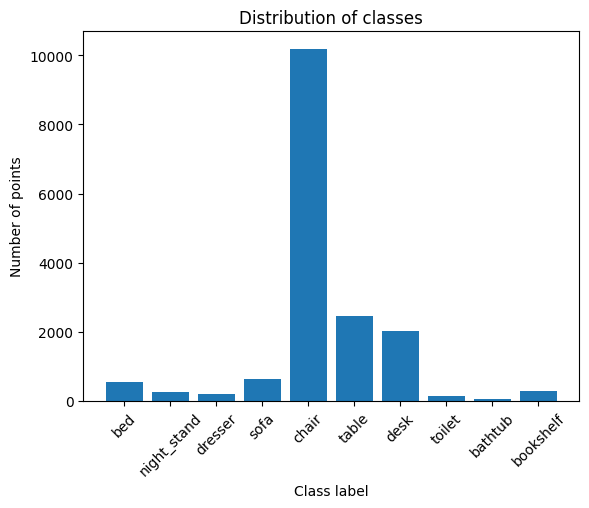

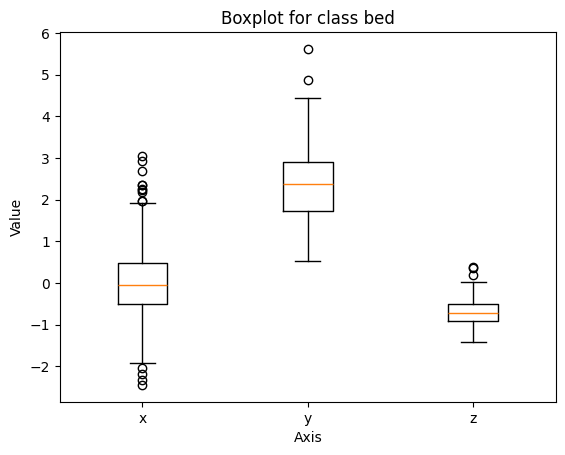

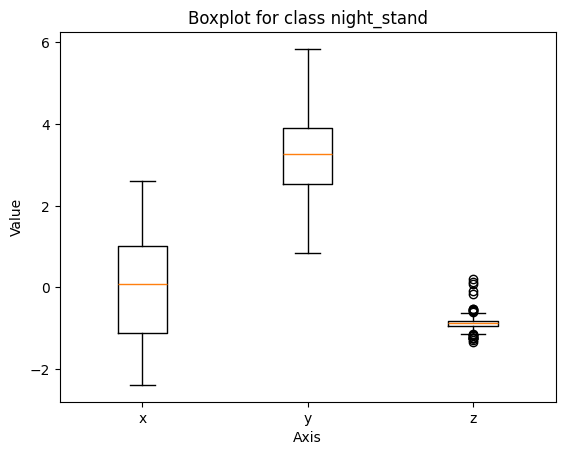

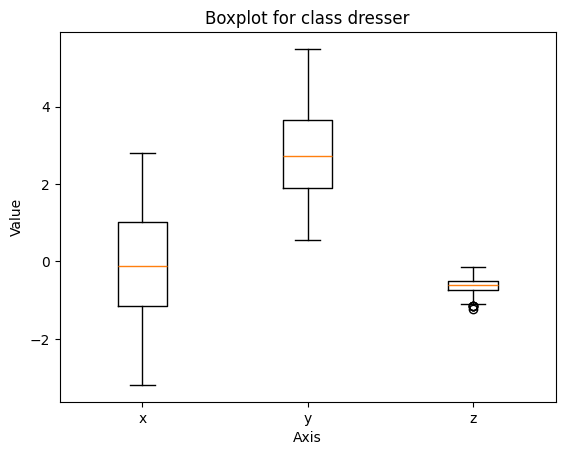

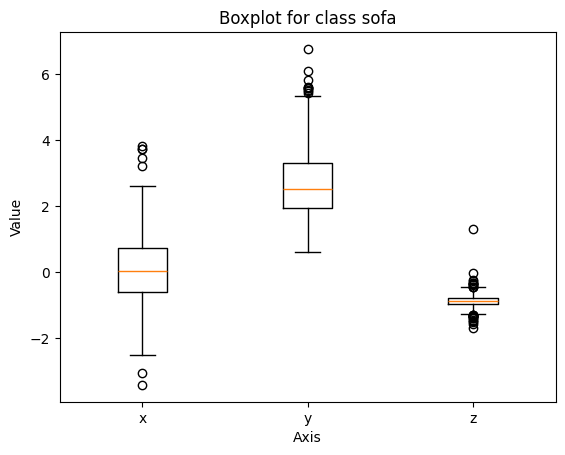

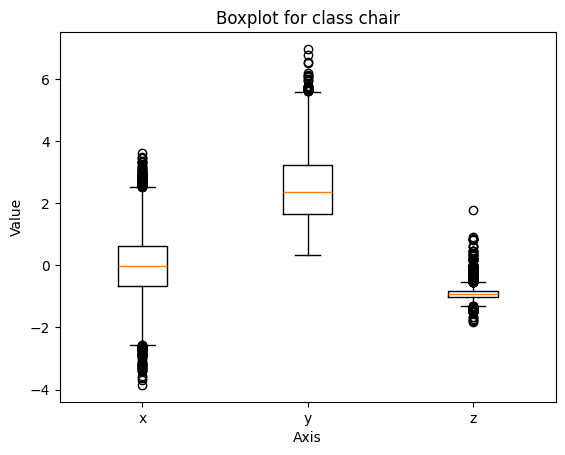

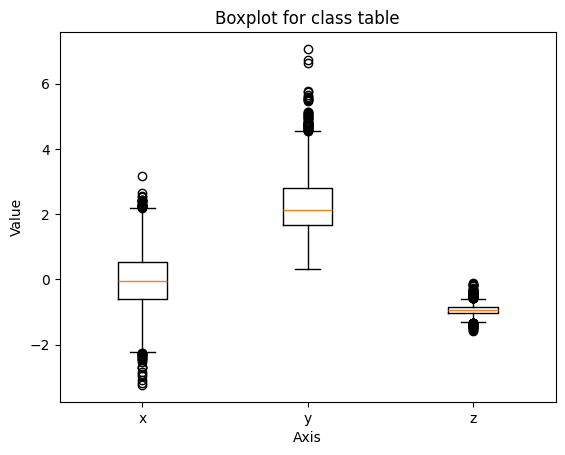

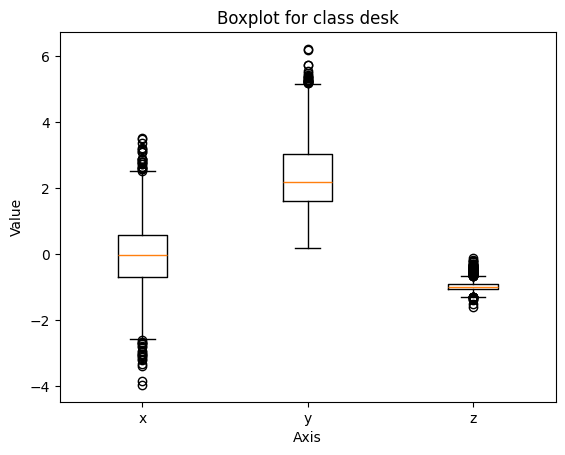

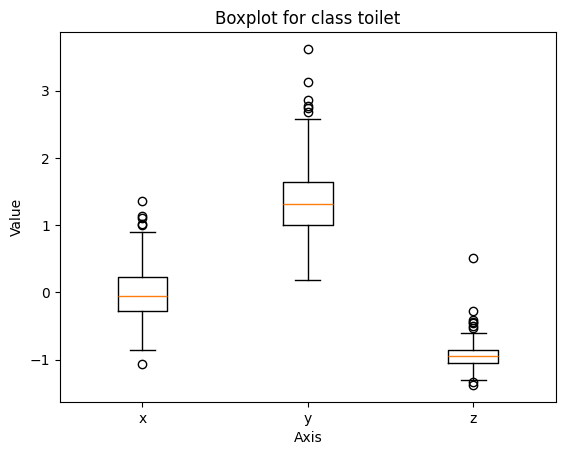

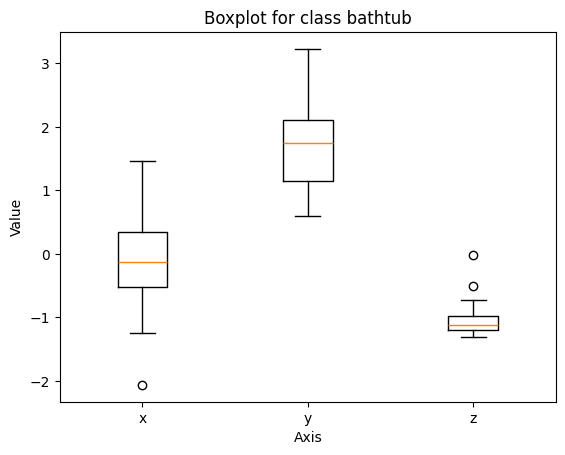

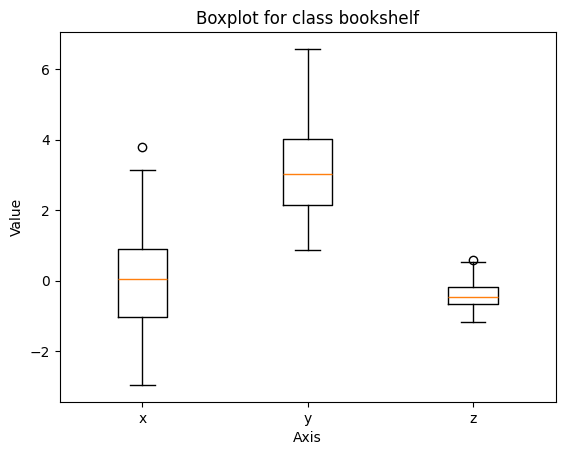

In [21]:
# Plot the distribution of the classes
plt.bar(class_dict.keys(), [len(class_dict[key]) for key in class_dict.keys()])
plt.xticks(rotation=45)
plt.xlabel('Class label')
plt.ylabel('Number of points')
plt.title('Distribution of classes')


# Find the boxplot for each classses' data
def analyze_classdict(class_dict):
    for key in class_dict.keys():
        data = class_dict[key]
        array = np.array(data)
        print(array.shape)

        numeric_data = array[:, :3].astype(float)
        x = numeric_data[:, 0]
        y = numeric_data[:, 1]
        z = numeric_data[:, 2]

        # Calculate the mean and standard deviation for each axis
        print(f"Class {key}:")
        print(f"Mean x: {np.mean(x)}")
        print(f"Mean y: {np.mean(y)}")
        print(f"Mean z: {np.mean(z)}")
        print(f"Std x: {np.std(x)}")
        print(f"Std y: {np.std(y)}")
        print(f"Std z: {np.std(z)}")

        # Plot individual boxplots for each class and each axis (x, y, z)
        plt.figure()
        plt.boxplot([x, y, z])
        plt.title(f'Boxplot for class {key}')
        plt.xlabel('Axis')
        plt.ylabel('Value')
        plt.xticks([1, 2, 3], ['x', 'y', 'z'])  # Set custom x-axis labels

    plt.show()

analyze_classdict(class_dict)

/var/folders/__/sxrs_frj41bdj4fb9smfcr9m0000gn/T/ipykernel_85130/3679062386.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


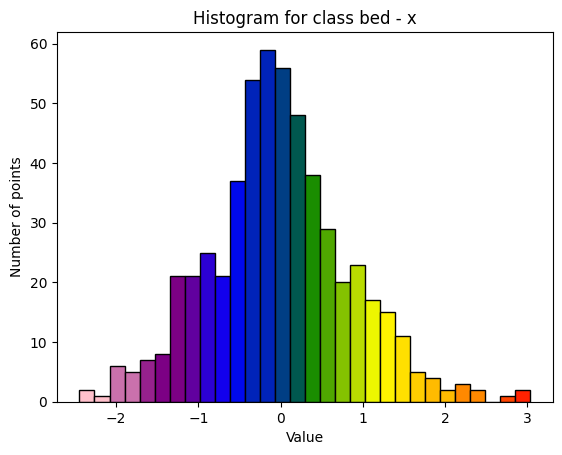

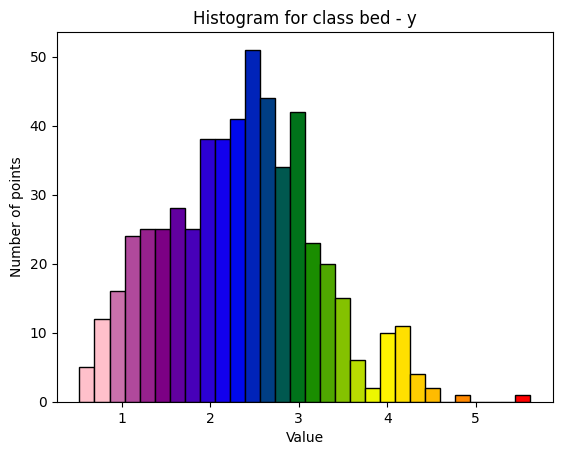

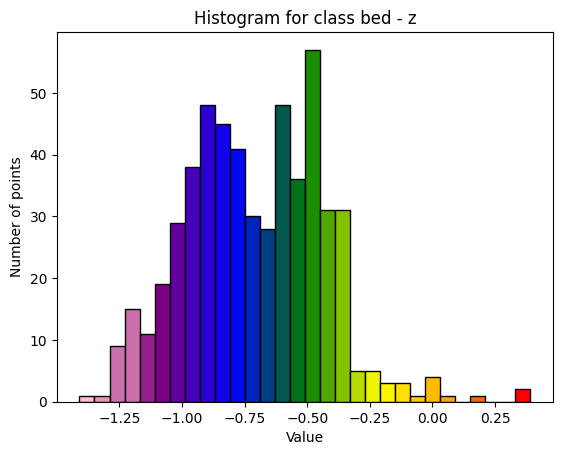

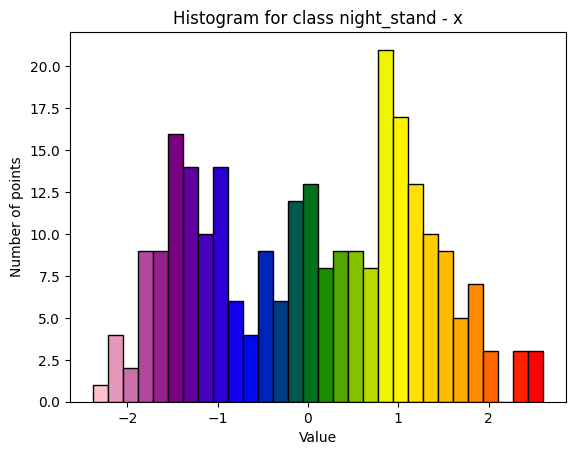

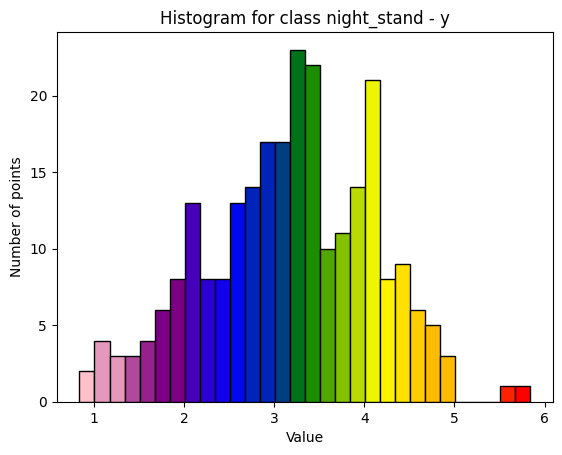

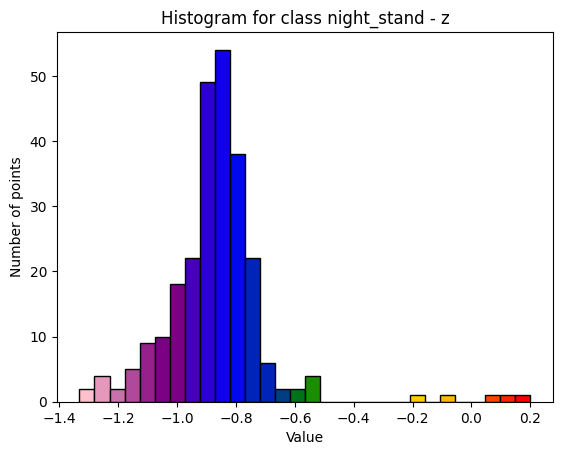

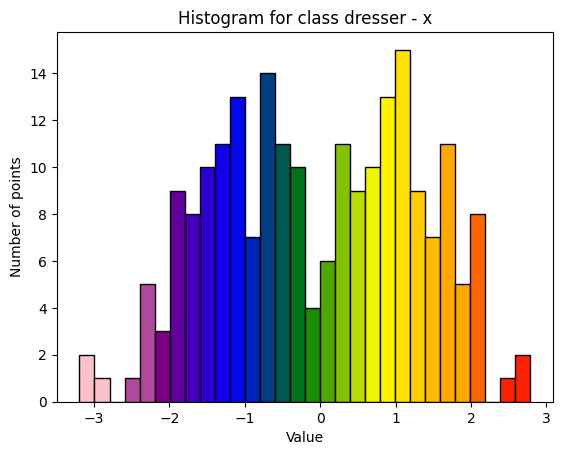

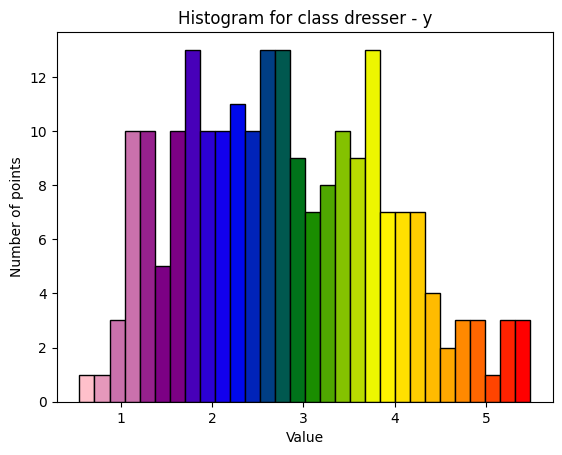

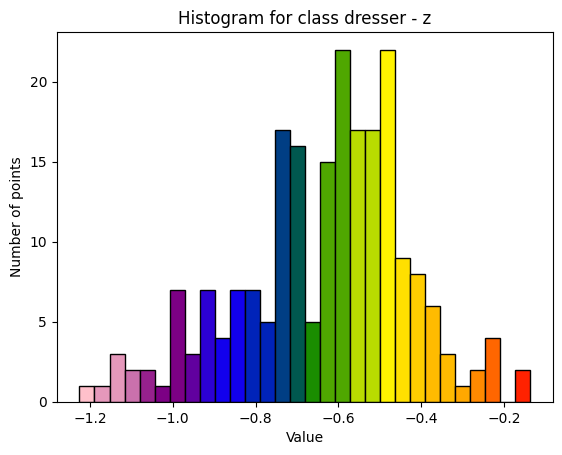

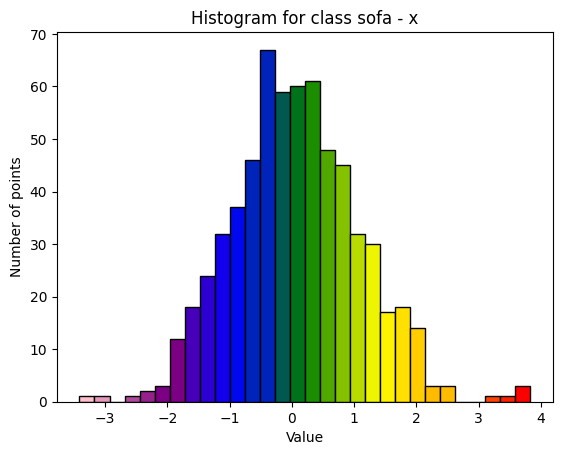

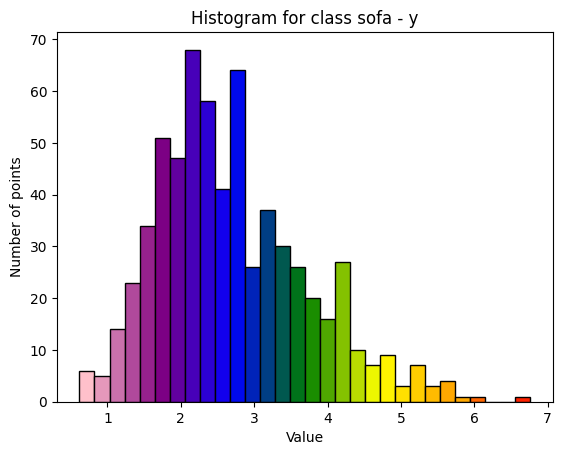

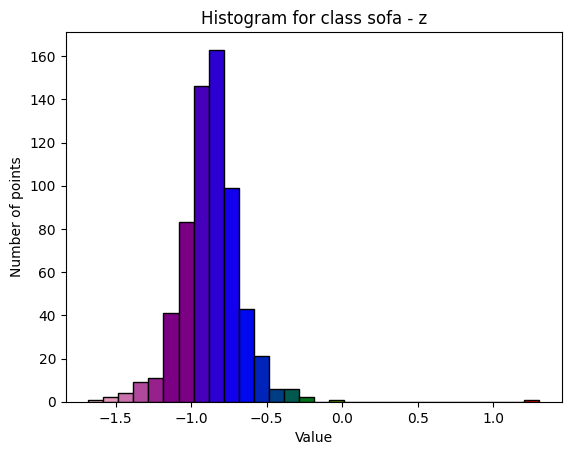

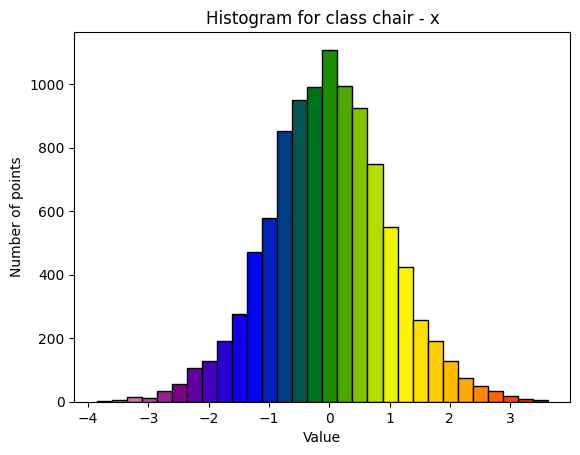

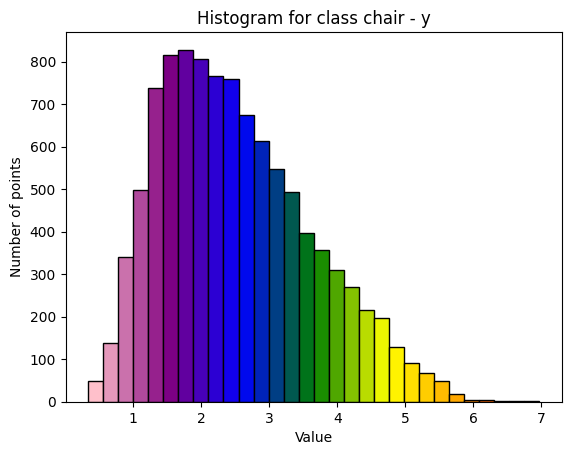

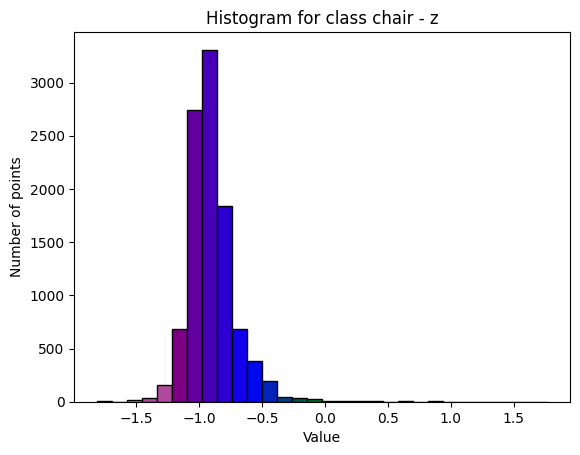

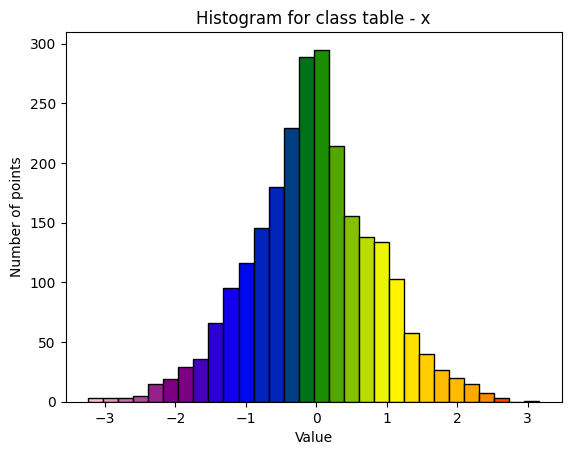

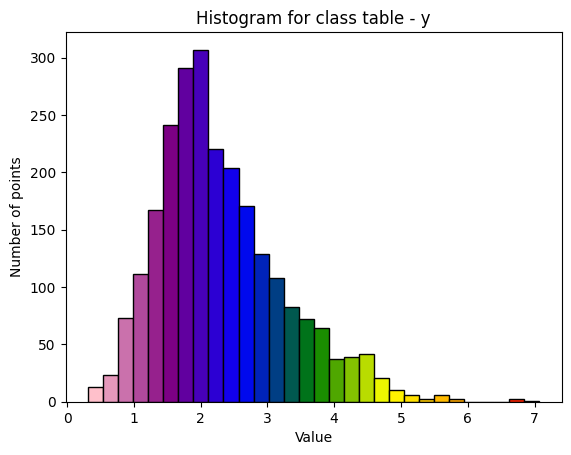

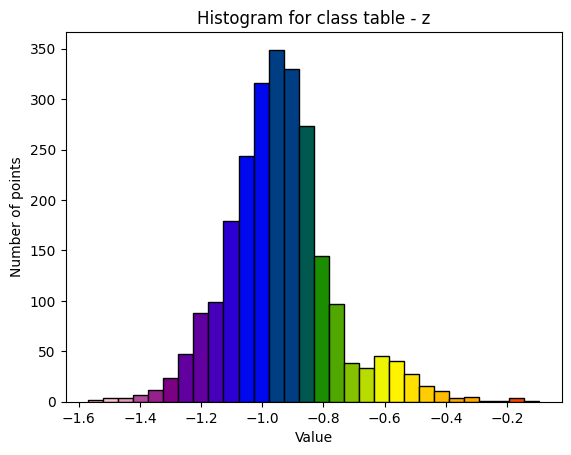

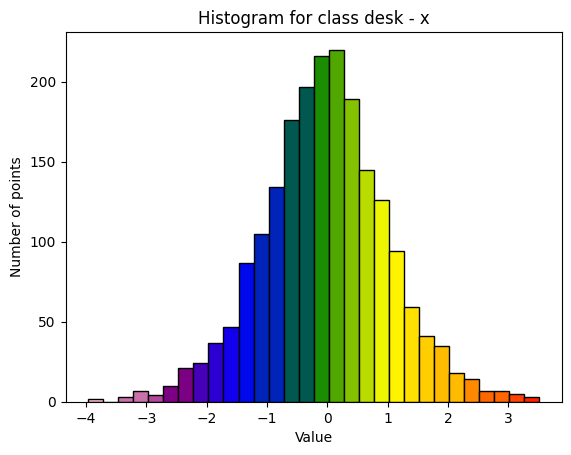

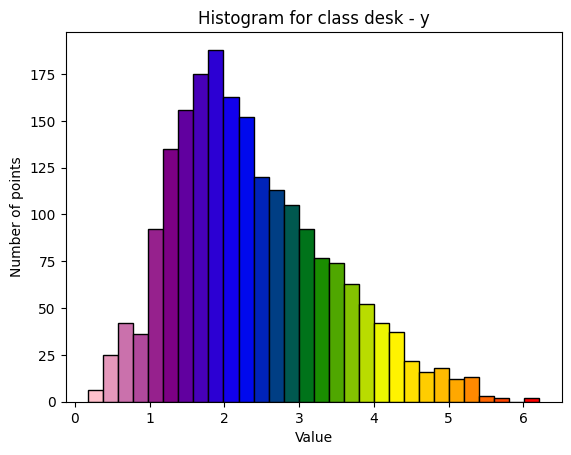

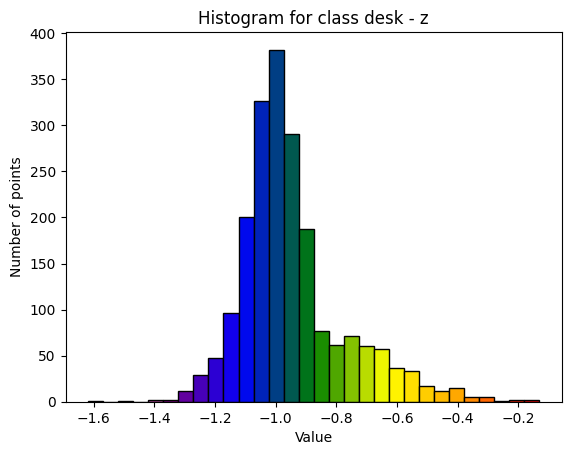

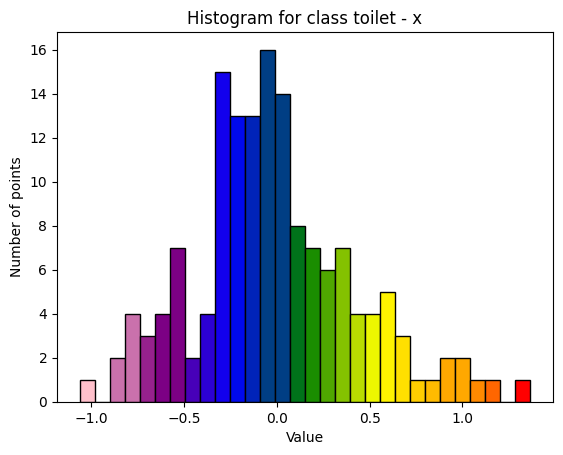

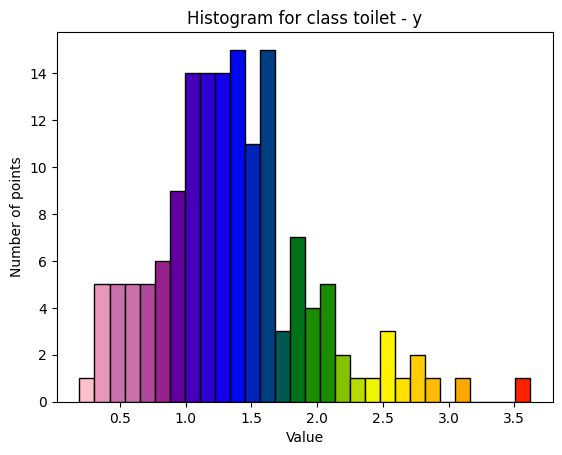

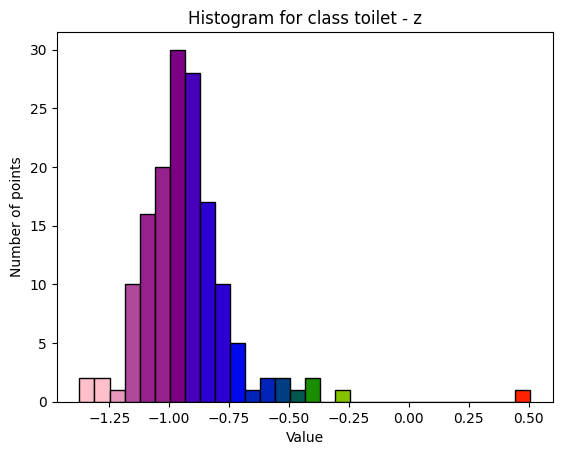

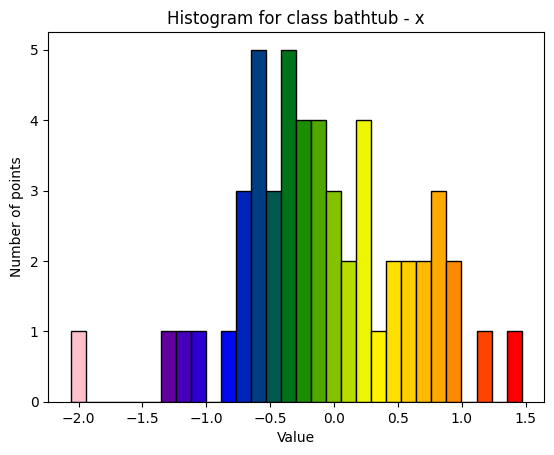

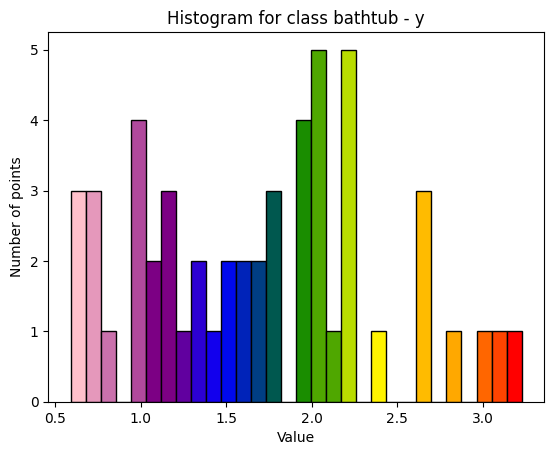

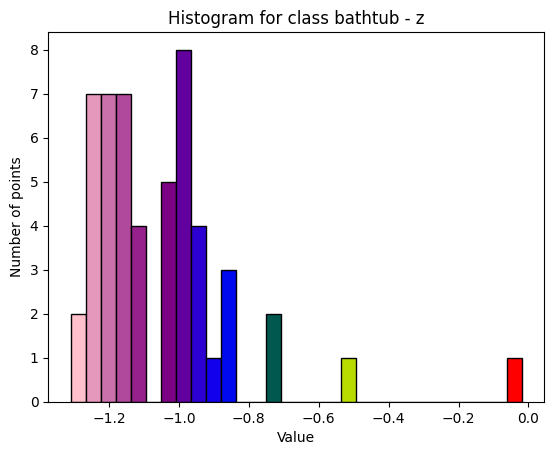

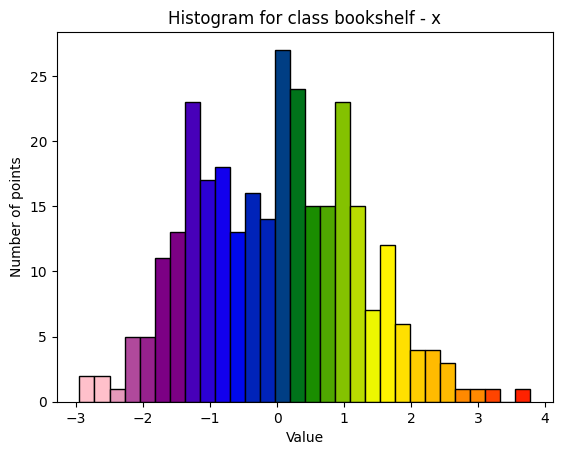

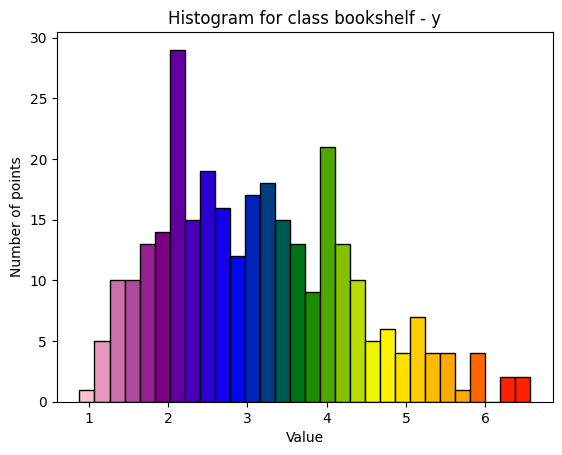

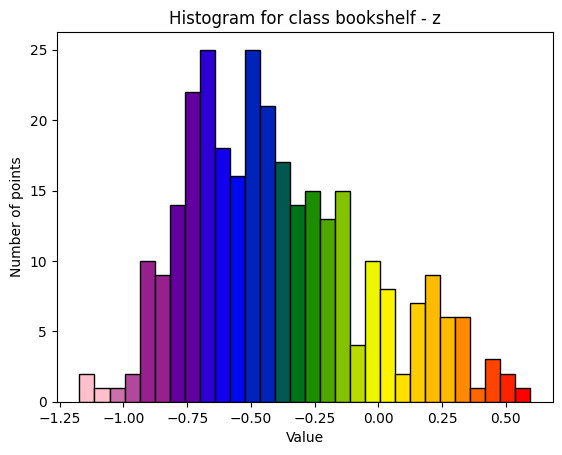

In [6]:
## Plot histograms for each class and each axis
## Height of the bars represent the number of points in that bin
## The bins are the values of the axis, and the number of bins can be adjusted
## The bins are colored in a gradient from pink to red, with pink representing the leftmost bin and red the rightmost bin

from matplotlib.colors import LinearSegmentedColormap

def plot_histograms(class_dict, bins=50):
    # Define a color map from pink to blue
    colors = ['#FFC0CB', '#800080', '#0000FF', '#008000', '#FFFF00', '#FFA500', '#FF0000']
    color_map = LinearSegmentedColormap.from_list('rainbow_color', colors, N=bins)

    # Save the plots for each class and axis as png files, directory is at class_histograms
    if not os.path.exists('class_histograms'):
        os.makedirs('class_histograms')

    for key in class_dict.keys():
        data = class_dict[key]
        array = np.array(data)

        x = array[:, 0]
        y = array[:, 1]
        z = array[:, 2]

        # Calculate histograms for x, y, z
        hist_x, bins_x = np.histogram(x, bins=bins)
        hist_y, bins_y = np.histogram(y, bins=bins)
        hist_z, bins_z = np.histogram(z, bins=bins)

        # Normalize bin indices to 0-1 scale for color mapping
        norm_x = plt.Normalize(bins_x.min(), bins_x.max())
        norm_y = plt.Normalize(bins_y.min(), bins_y.max())
        norm_z = plt.Normalize(bins_z.min(), bins_z.max())

        # Create plots for x, y, z with color gradients
        fig, ax = plt.subplots()
        for i in range(len(bins_x)-1):
            ax.bar(bins_x[i], hist_x[i], width=bins_x[i+1]-bins_x[i], color=color_map(norm_x(bins_x[i])), align='edge', edgecolor='black')
        ax.set_title(f'Histogram for class {key} - x')
        ax.set_xlabel('Value')
        ax.set_ylabel('Number of points')
        plt.savefig(f'class_histograms/histogram_{key}_x.png')

        fig, ax = plt.subplots()
        for i in range(len(bins_y)-1):
            ax.bar(bins_y[i], hist_y[i], width=bins_y[i+1]-bins_y[i], color=color_map(norm_y(bins_y[i])), align='edge', edgecolor='black')
        ax.set_title(f'Histogram for class {key} - y')
        ax.set_xlabel('Value')
        ax.set_ylabel('Number of points')
        plt.savefig(f'class_histograms/histogram_{key}_y.png')

        fig, ax = plt.subplots()
        for i in range(len(bins_z)-1):
            ax.bar(bins_z[i], hist_z[i], width=bins_z[i+1]-bins_z[i], color=color_map(norm_z(bins_z[i])), align='edge', edgecolor='black')
        ax.set_title(f'Histogram for class {key} - z')
        ax.set_xlabel('Value')
        ax.set_ylabel('Number of points')
        plt.savefig(f'class_histograms/histogram_{key}_z.png')


    plt.show()

plot_histograms(class_dict, bins=30)

## Identifying outliers and plot them as 3D Point clouds

In [23]:
def identify_outliers(class_dict, threshold=1.5):
    # Outliers are defined as points that fall outside the whiskers of the boxplot - 1.5 * IQR

    outliers_dict = {}

    for key in class_dict.keys():
        data = class_dict[key]
        array = np.array(data)

        numeric_data = array[:, :3].astype(float)
        x = numeric_data[:, 0]
        y = numeric_data[:, 1]
        z = numeric_data[:, 2]

        filename = array[:, -1]

        # Calculate the IQR for each axis
        q1_x, q3_x = np.percentile(x, [25, 75])
        iqr_x = q3_x - q1_x
        lower_bound_x = q1_x - threshold * iqr_x
        upper_bound_x = q3_x + threshold * iqr_x

        q1_y, q3_y = np.percentile(y, [25, 75])
        iqr_y = q3_y - q1_y
        lower_bound_y = q1_y - threshold * iqr_y
        upper_bound_y = q3_y + threshold * iqr_y

        q1_z, q3_z = np.percentile(z, [25, 75])
        iqr_z = q3_z - q1_z
        lower_bound_z = q1_z - threshold * iqr_z
        upper_bound_z = q3_z + threshold * iqr_z

        # Identify outliers in any of the three axes
        outliers = array[
            (x < lower_bound_x) | (x > upper_bound_x) |
            (y < lower_bound_y) | (y > upper_bound_y) |
            (z < lower_bound_z) | (z > upper_bound_z)
        ]

        # Get the coordinates of the outliers
        outlier_coords = outliers[:, :3]
        outlier_filenames = outliers[:, -1]  # Assuming the filename is the last column

        print(f"Class {key} outliers:")
        for coords, filename in zip(outlier_coords, outlier_filenames):
            print(f"Coords: {coords}, Filename: {filename}")

        outliers_dict[key] = outliers

    return outliers_dict

outliers_dict = identify_outliers(class_dict, threshold=1.5)

Class bed outliers:
Coords: ['2.93125' '4.25625' '-0.578848'], Filename: 000027_bbox.npy
Coords: ['2.224213' '3.838676' '-0.562052'], Filename: 000029_bbox.npy
Coords: ['-2.177273' '3.572727' '-0.788636'], Filename: 000193_bbox.npy
Coords: ['2.349964' '3.964815' '-0.606818'], Filename: 000408_bbox.npy
Coords: ['2.25' '3.743106' '-0.593182'], Filename: 000748_bbox.npy
Coords: ['1.009706' '5.61668' '-0.468106'], Filename: 000800_bbox.npy
Coords: ['1.967236' '3.268151' '-0.859848'], Filename: 000856_bbox.npy
Coords: ['0.272727' '3.040909' '0.390909'], Filename: 000856_bbox.npy
Coords: ['2.358082' '3.936777' '-0.682576'], Filename: 000858_bbox.npy
Coords: ['1.968139' '4.143026' '0.363636'], Filename: 000858_bbox.npy
Coords: ['-0.722727' '2.427273' '0.181818'], Filename: 000859_bbox.npy
Coords: ['3.036364' '4.05' '-0.347727'], Filename: 000875_bbox.npy
Coords: ['-2.445759' '4.437389' '0.031061'], Filename: 000878_bbox.npy
Coords: ['2.677031' '4.132299' '-0.876841'], Filename: 001926_bbox.np

In [24]:
print(outliers_dict)

{'bed': array([['2.93125', '4.25625', '-0.578848', '1.0', '000027_bbox.npy'],
       ['2.224213', '3.838676', '-0.562052', '1.0', '000029_bbox.npy'],
       ['-2.177273', '3.572727', '-0.788636', '1.0', '000193_bbox.npy'],
       ['2.349964', '3.964815', '-0.606818', '1.0', '000408_bbox.npy'],
       ['2.25', '3.743106', '-0.593182', '1.0', '000748_bbox.npy'],
       ['1.009706', '5.61668', '-0.468106', '1.0', '000800_bbox.npy'],
       ['1.967236', '3.268151', '-0.859848', '1.0', '000856_bbox.npy'],
       ['0.272727', '3.040909', '0.390909', '1.0', '000856_bbox.npy'],
       ['2.358082', '3.936777', '-0.682576', '1.0', '000858_bbox.npy'],
       ['1.968139', '4.143026', '0.363636', '1.0', '000858_bbox.npy'],
       ['-0.722727', '2.427273', '0.181818', '1.0', '000859_bbox.npy'],
       ['3.036364', '4.05', '-0.347727', '1.0', '000875_bbox.npy'],
       ['-2.445759', '4.437389', '0.031061', '1.0', '000878_bbox.npy'],
       ['2.677031', '4.132299', '-0.876841', '1.0', '001926_bbox.npy